## Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random


## Functions

In [12]:
## input data = array of all dimensions 
## example of imput data --> [[1,2],[2,1]..] || [[1,2,3],[4,5,6]..]  ... 

def schwefel(data):
    result = []   
    n = len(data[0])
    for i in range(len(data)):
      result.append((418.9829*n) - (np.sum( data[i] * np.sin( np.sqrt( np.abs( data[i] ))))))  
    return result 

def sum_squared(data):
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      result.append(np.sum(j*np.power(data[i],2)))  
    return result

def sphere_function(data):
    result = []
    for i in range(len(data)):
      result.append(np.sum(np.power(data[i],2)))  
    return result

def rastrigin(data):
    result = []
    for i in range(len(data)):
      n = len(data[i])
      result.append(10*n+sum(np.power(data[i],2)-10*np.cos([val*2*np.pi for val in data[i]])))
    return result

def zakharov(data): 
    result = []
    for i in range(len(data)):
      n = len(data[i])
      j = np.arange( 1., n+1 )
      s2 = sum( j * data[i] ) / 2
      result.append(sum( np.power(data[i],2)) + np.power(s2,2) + np.power(s2,4))
    return result


    


In [13]:
def local_search(fun,lim_up,lim_down,dimension=2,iterations=100,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        if(minimal_value<start_func):
            curr_best = generated_val[func_vals.index(minimal_value)]
            start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval

def hill_climber(fun,lim_up,lim_down,dimension=2,iterations=100,
                        num_neighbours=100,s_div=0.1):
    points_,generated_val,points_fval = [],[],[] 
    curr_best = start = np.random.uniform(lim_up,lim_down,(1,dimension))
    start_func = fun(start)
    for i in range(iterations):
        generated_val = []
        for j in range(num_neighbours):
            current_test = np.random.normal(curr_best,s_div) 
            while(True):
                if(((current_test>=lim_up).all() and (current_test<=lim_down).all())):
                    generated_val.append(current_test)
                    break
                else:
                    current_test = np.random.normal(curr_best,s_div)
        func_vals=np.array(list(map(fun,generated_val))).tolist()
        minimal_value=min(func_vals)
        curr_best = generated_val[func_vals.index(minimal_value)]
        start_func=minimal_value
        points_.append(curr_best)
        points_fval.append(start_func)
    return points_,points_fval

In [14]:
schwefel_limits = [-500,500]
rastrigin_limits = [-5.12,5.12]
spehere_limits = [-5.12,5.12]
sum_squared_limits = [-5.12,5.12]
zakharov_limits = [-5,10]

ls_schwefel =local_search(schwefel,schwefel_limits[0],schwefel_limits[1])
ls_rastrigin=local_search(rastrigin,rastrigin_limits[0],rastrigin_limits[1])
ls_sphere=local_search(sphere_function,spehere_limits[0],spehere_limits[1])
ls_sum_squared=local_search(sum_squared,sum_squared_limits[0],sum_squared_limits[1])
ls_zaharkov=local_search(zakharov,zakharov_limits[0],zakharov_limits[1])

hill_schwefel=hill_climber(schwefel,schwefel_limits[0],schwefel_limits[1])
hill_rastrigin=hill_climber(rastrigin,rastrigin_limits[0],rastrigin_limits[1])
hill_spere=hill_climber(sphere_function,spehere_limits[0],spehere_limits[1])
hil_sum_squared=hill_climber(sum_squared,sum_squared_limits[0],sum_squared_limits[1])
hill_zaarkov=hill_climber(zakharov,zakharov_limits[0],zakharov_limits[1])


# SCHWEFEL

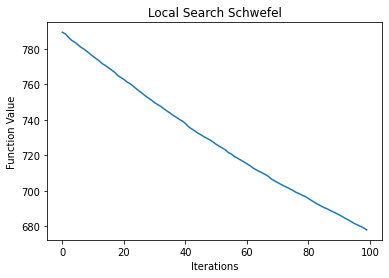

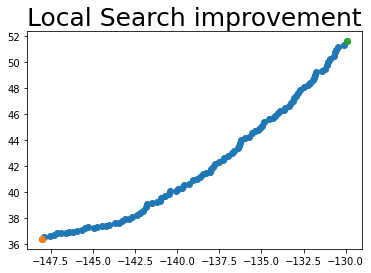

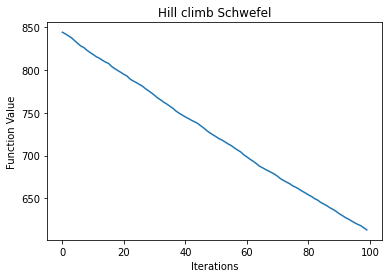

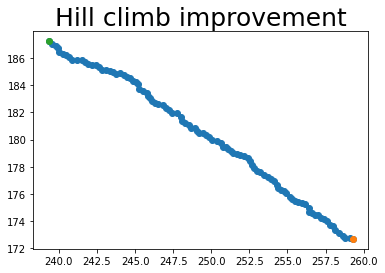

In [16]:

fig = plt.figure()
plt.plot(np.arange(0,100,1),ls_schwefel[1],label='Schwefel')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Local Search Schwefel')
plt.show()

g_p=np.asarray(ls_schwefel[0]).reshape((-1,2))
x=np.linspace(schwefel_limits[0],schwefel_limits[1],100)
y=np.linspace(schwefel_limits[0],schwefel_limits[1],100)

fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Local Search improvement", fontsize=25)
plt.show()

fig = plt.figure()
plt.plot(np.arange(0,100,1),hill_schwefel[1],label='Schwefel')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Hill climb Schwefel')
plt.show()

g_p=np.asarray(hill_schwefel[0]).reshape((-1,2))
x=np.linspace(schwefel_limits[0],schwefel_limits[1],100)
y=np.linspace(schwefel_limits[0],schwefel_limits[1],100)


fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Hill climb improvement", fontsize=25)
plt.show()

# Rastrigin

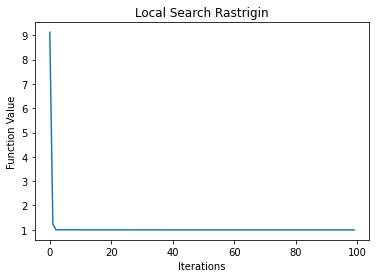

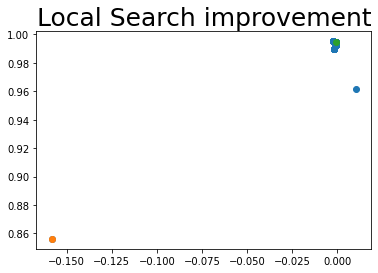

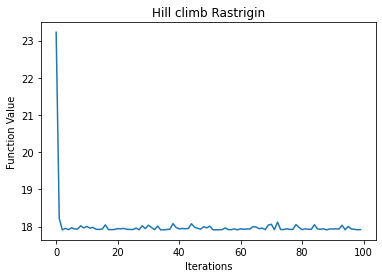

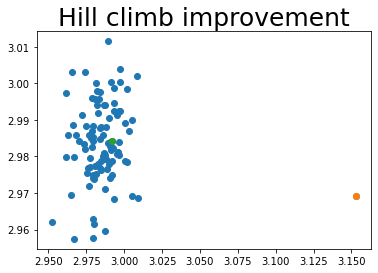

In [18]:
fig = plt.figure()
plt.plot(np.arange(0,100,1),ls_rastrigin[1],label='Rastrigin')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Local Search Rastrigin')
plt.show()

g_p=np.asarray(ls_rastrigin[0]).reshape((-1,2))
x=np.linspace(rastrigin_limits[0],rastrigin_limits[1],100)
y=np.linspace(rastrigin_limits[0],rastrigin_limits[1],100)

fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Local Search improvement", fontsize=25)
plt.show()

fig = plt.figure()
plt.plot(np.arange(0,100,1),hill_rastrigin[1],label='Rastrigin')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Hill climb Rastrigin')
plt.show()

g_p=np.asarray(hill_rastrigin[0]).reshape((-1,2))
x=np.linspace(rastrigin_limits[0],rastrigin_limits[1],100)
y=np.linspace(rastrigin_limits[0],rastrigin_limits[1],100)


fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Hill climb improvement", fontsize=25)
plt.show()

# Sphere

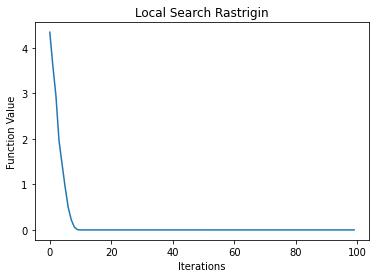

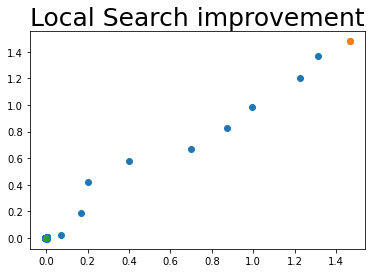

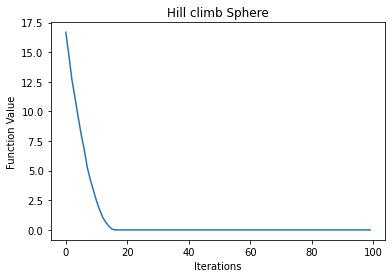

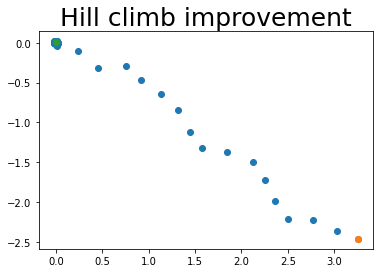

In [19]:
fig = plt.figure()
plt.plot(np.arange(0,100,1),ls_sphere[1],label='Sphere')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Local Search Rastrigin')
plt.show()

g_p=np.asarray(ls_sphere[0]).reshape((-1,2))
x=np.linspace(spehere_limits[0],spehere_limits[1],100)
y=np.linspace(spehere_limits[0],spehere_limits[1],100)

fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Local Search improvement", fontsize=25)
plt.show()

fig = plt.figure()
plt.plot(np.arange(0,100,1),hill_spere[1],label='Sphere')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Hill climb Sphere')
plt.show()

g_p=np.asarray(hill_spere[0]).reshape((-1,2))
x=np.linspace(spehere_limits[0],spehere_limits[1],100)
y=np.linspace(spehere_limits[0],spehere_limits[1],100)


fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Hill climb improvement", fontsize=25)
plt.show()

# Sum Squared

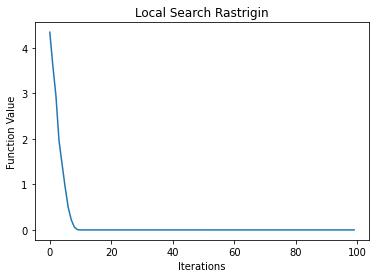

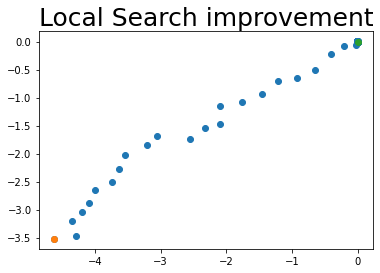

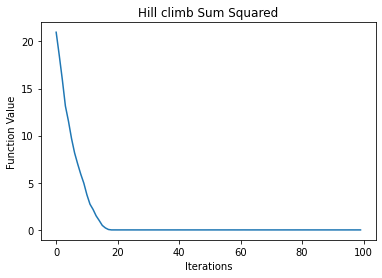

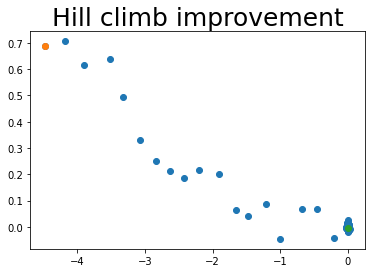

In [20]:
fig = plt.figure()
plt.plot(np.arange(0,100,1),ls_sphere[1],label='Sum Squared')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Local Search Rastrigin')
plt.show()

g_p=np.asarray(ls_sum_squared[0]).reshape((-1,2))
x=np.linspace(sum_squared_limits[0],sum_squared_limits[1],100)
y=np.linspace(sum_squared_limits[0],sum_squared_limits[1],100)

fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Local Search improvement", fontsize=25)
plt.show()

fig = plt.figure()
plt.plot(np.arange(0,100,1),hil_sum_squared[1],label='Sum Squared')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Hill climb Sum Squared')
plt.show()

g_p=np.asarray(hil_sum_squared[0]).reshape((-1,2))
x=np.linspace(sum_squared_limits[0],sum_squared_limits[1],100)
y=np.linspace(sum_squared_limits[0],sum_squared_limits[1],100)


fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Hill climb improvement", fontsize=25)
plt.show()

# Zaharkov

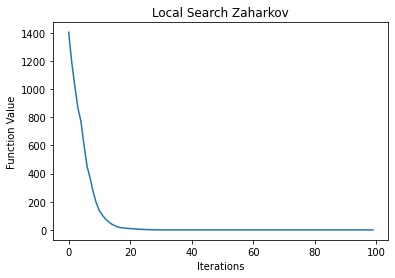

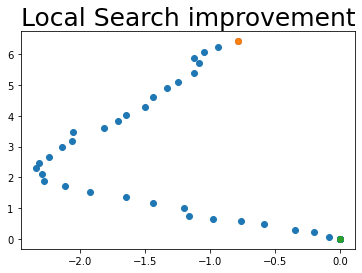

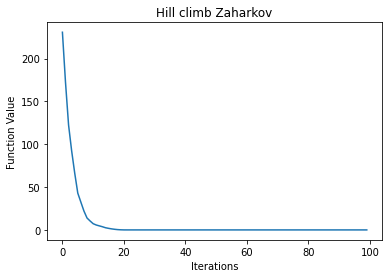

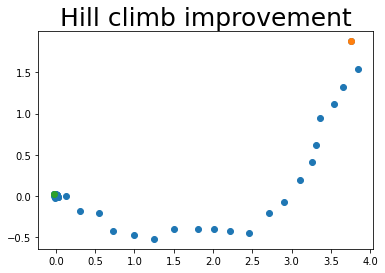

In [21]:
fig = plt.figure()
plt.plot(np.arange(0,100,1),ls_zaharkov[1],label='Zaharkov')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Local Search Zaharkov')
plt.show()

g_p=np.asarray(ls_zaharkov[0]).reshape((-1,2))
x=np.linspace(zakharov_limits[0],zakharov_limits[1],100)
y=np.linspace(zakharov_limits[0],zakharov_limits[1],100)

fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Local Search improvement", fontsize=25)
plt.show()

fig = plt.figure()
plt.plot(np.arange(0,100,1),hill_zaarkov[1],label='Zaharkov')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Hill climb Zaharkov')
plt.show()

g_p=np.asarray(hill_zaarkov[0]).reshape((-1,2))
x=np.linspace(zakharov_limits[0],zakharov_limits[1],100)
y=np.linspace(zakharov_limits[0],zakharov_limits[1],100)


fig=plt.figure()
plt.scatter(g_p[:,0],g_p[:,1])
plt.scatter(g_p[0,0],g_p[0,1])
plt.scatter(g_p[-1,0],g_p[-1,1])
plt.title("Hill climb improvement", fontsize=25)
plt.show()